In [ ]:
import nltk
import scipy.stats as ss
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud, STOPWORDS
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [ ]:
from nltk.corpus import reuters
from nltk.corpus import wordnet

In [ ]:
nltk.download('reuters')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [ ]:
reuters_words = [w.lower() for w in reuters.words()]
words = set(reuters_words)
counts = [(w, reuters_words.count(w)) for w in words]

In [ ]:
words_1 = [w for (w, c) in counts]
counts_1 = [c for (w, c) in counts]

In [ ]:
count_rank = ss.rankdata([c for (w, c) in counts])
count_rank

array([13183.5,  5513. ,  5513. , ...,  5513. , 24244. ,  5513. ])

In [ ]:
counts_ranked = zip(words_1, counts_1, count_rank)
#counts_ranked[100:110]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
counts_sorted = sorted(counts_ranked, key=lambda item: item[2])
counts_sorted[20000:20010]

[('odgers', 5, 19949.0),
 ('onset', 5, 19949.0),
 ('ambassadors', 5, 19949.0),
 ('outdoor', 5, 19949.0),
 ('beeba', 5, 19949.0),
 ('unimedia', 5, 19949.0),
 ('plough', 5, 19949.0),
 ('enof', 5, 19949.0),
 ('drums', 5, 19949.0),
 ('bramalea', 5, 19949.0)]

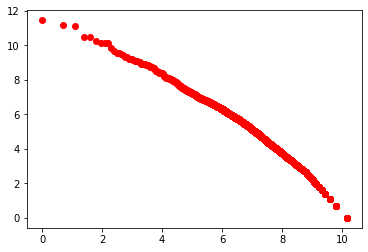

In [ ]:
L = len(counts_sorted)
plt.plot([math.log(L-r+1) for (w, c, r) in counts_sorted], [math.log(c) for (w, c, r) in counts_sorted], 'ro')

In [ ]:
import numpy as np

In [ ]:
# generate x and y
x = [math.log(L-r+1) for (w, c, r) in counts_sorted]
y = [math.log(c) for (w,c,r) in counts_sorted]
X = np.array(x)
Y = np.array(y)
A = np.vstack([X, np.ones(len(X))]).T
Y_ = Y[:, np.newaxis]
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),Y_)
print(alpha)

[[-1.59893073]
 [16.37719998]]


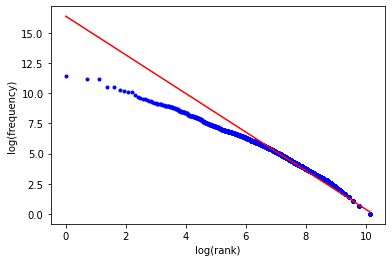

In [ ]:
plt.plot(X, Y, 'b.')
plt.plot(X, alpha[0]*X + alpha[1], 'r')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()

In [ ]:
# HERE WE REMOVED STOPWORDS AND MADE THE WORD CLOUD WITHOUT STEMMING
stopwords = set(STOPWORDS)
compile_text = ""
for w in reuters_words:
  # val = porter.stem(w)
  compile_text = compile_text + w.lower()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(compile_text)

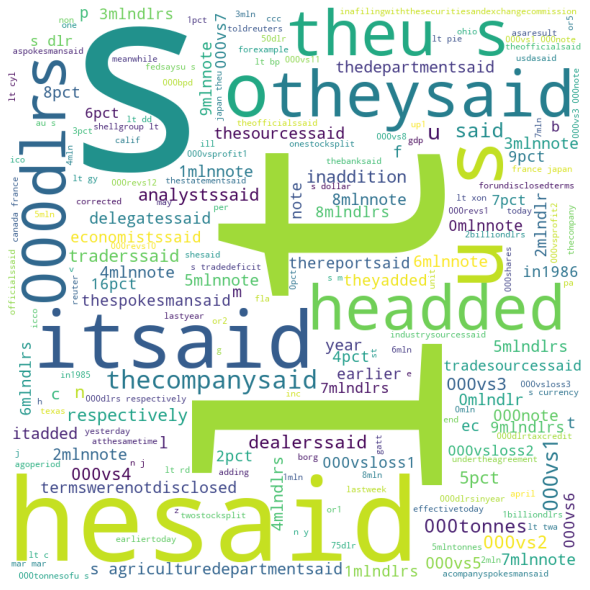

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
# HERE WE MADE THE WORD CLOUD AFTER REMOVING STOP WORDS + ALSO DOING STEMMING ON IT
stopwords = set(STOPWORDS)
compile_text_withStem = ""
for w in reuters_words:
  val = porter.stem(w)
  compile_text = compile_text + val.lower()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(compile_text)

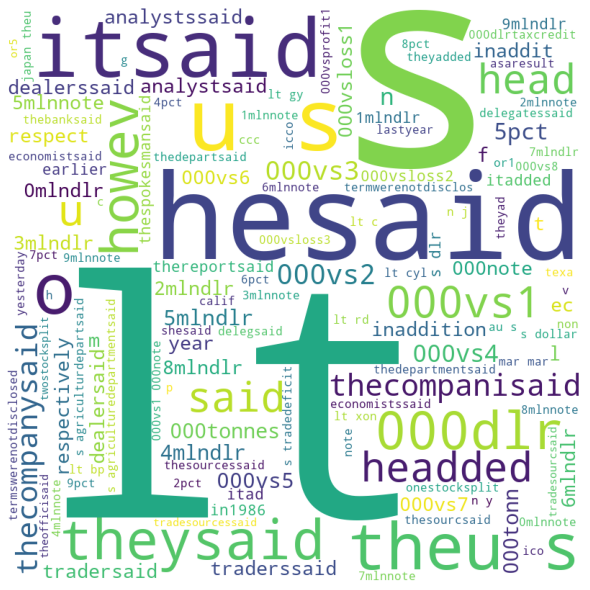

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()